# Laboratorium 2


### Konfiguracja

In [1]:
import functools
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
from matplotlib.widgets import Button
import json as js

class _Button_callback(object):
    def __init__(self, scenes):
        self.i = 0
        self.scenes = scenes

    def set_axis(self, ax):
        self.ax = ax
        
    def next(self, event):
        self.i = (self.i + 1) % len(scenes)
        self.draw()

    def prev(self, event):
        self.i = (self.i - 1) % len(scenes)
        self.draw()
        
    def draw(self):
        self.ax.clear()
        for collection in self.scenes[self.i].points:
            if len(collection.points) > 0:
                self.ax.scatter(*zip(*(np.array(collection.points))), c=collection.color, marker=collection.marker)
        for collection in self.scenes[self.i].lines:
            self.ax.add_collection(collection.get_collection())
        self.ax.autoscale()
        plt.draw()

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [2]:
class Scene:
    def __init__(self, points=[], lines=[]):
        self.points=points
        self.lines=lines

class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker

class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, colors=mcolors.to_rgba(self.color))
        else:
            return mcoll.LineCollection(self.lines)
            


class Plot:
    def __init__(self, scenes = [], json = None):
        if json is None:
            self.scenes = scenes
        else:
            self.scenes = [Scene([PointsCollection(pointsCol) for pointsCol in scene["points"]], 
                                 [LinesCollection(linesCol) for linesCol in scene["lines"]]) 
                           for scene in js.loads(json)]
        
    def __configure_buttons(self, callback):
        plt.subplots_adjust(bottom=0.2)
        axprev = plt.axes([0.6, 0.05, 0.15, 0.075])
        axnext = plt.axes([0.76, 0.05, 0.15, 0.075])
        bnext = Button(axnext, 'Następny')
        bnext.on_clicked(callback.next)
        bprev = Button(axprev, 'Poprzedni')
        bprev.on_clicked(callback.prev)
        return [bprev, bnext]

    def draw(self):
        plt.close()
        callback = _Button_callback(self.scenes)
        self.widgets = self.__configure_buttons(callback)
        callback.set_axis(plt.axes())
        plt.show()
        callback.draw()
        
    def toJSON(self):
        return js.dumps([{"points": [pointCol.points.tolist() for pointCol in scene.points], 
                          "lines":[linesCol.lines for linesCol in scene.lines]} 
                         for scene in self.scenes])
    

### Przykład użycia

<IPython.core.display.Javascript object>


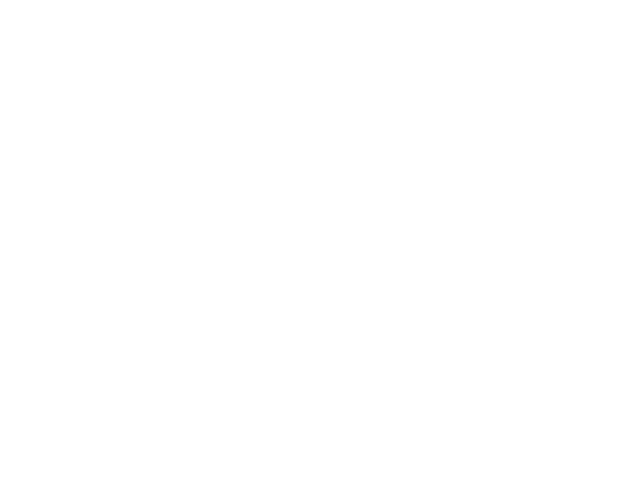

In [3]:
%matplotlib notebook

scenes=[Scene([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
               PointsCollection([(5, -2), (2, 2), (-2, -1)], 'green', marker = "^")], 
              [LinesCollection([[(1,2),(2,3)], [(0,1),(1,0)]], 'orange')]), 
        Scene([PointsCollection([(1, 2), (-15, 1.5), (2, -1)], 'red'), 
               PointsCollection([(5, -2), (2, 2), (-2, 1)], 'black')], 
              [LinesCollection([[(-1,2),(-2,3)], [(0,-1),(-1,0)]])])]

plot = Plot(scenes)
plot.draw() 


### Rozwiązanie

In [4]:
def generate_random(amount=100, minimum=-100, maximum=100):
    points = []
    for i in range(0, amount):
        points.append((random.uniform(minimum, maximum), random.uniform(minimum, maximum)))
    return points

def generate_on_circle(amount=100, center=(0, 0), radius=10):
    points = []
    for i in range(0, amount):
        theta = random.random() * 2 * np.pi
        points.append((center[0] + np.cos(theta) * radius, center[1] + np.sin(theta) * radius))
    return points

def generate_on_rectangle(amount=100, lower_left=(-10, -10), upper_right=(10,10)):
    points = []
    a = (upper_right[0]-lower_left[0])
    b = (upper_right[1]-lower_left[1])
    length = 2*(a)+2*(b)
    for i in range(0, amount):
        p = random.uniform(0, length)
        if p<a:
            x = lower_left[0]
            y = lower_left[1] + p
        elif p<a+b:
            x = lower_left[0] + p - a
            y = upper_right[1]
        elif p<2*a+b:
            x = upper_right[0]
            y = upper_right[1]-p+a+b
        else:
            x = upper_right[0]-p+2*a+b
            y = lower_left[1]
           
        points.append((x, y))
    return points

def generate_on_square(amount_on_sides=25, amount_on_diagonal=20, lower_left=(0,0), upper_right=(10,10)):
    points  = []
    l = upper_right[0]-lower_left[0]
    for i in range(0, amount_on_sides):
        p = random.uniform(0, l)
        x = lower_left[0]
        y = lower_left[1]+p
        points.append((x, y))
    for i in range(0, amount_on_sides):
        p = random.uniform(0, l)
        x = lower_left[0]+p
        y = lower_left[1]
        points.append((x, y))
    for i in range(0, amount_on_diagonal):
        p = random.uniform(lower_left[0], upper_right[0])
        points.append((p, p))
    for i in range(0, amount_on_diagonal):
        p = random.uniform(lower_left[0], upper_right[0])
        x = lower_left[0]
        points.append((upper_right[0]-lower_left[0]-p, p))
    return points
        

# zad 1, 2, 3

## dataset 1

<IPython.core.display.Javascript object>


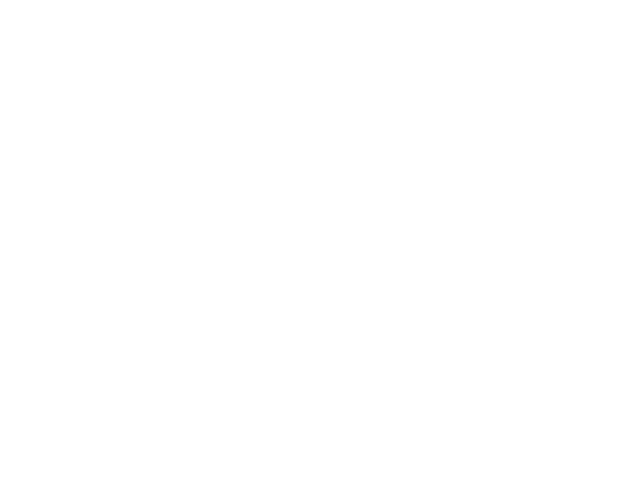

In [5]:
%matplotlib notebook
plot = Plot([Scene([PointsCollection(generate_random())])])
plot.draw()

## dataset 2

<IPython.core.display.Javascript object>


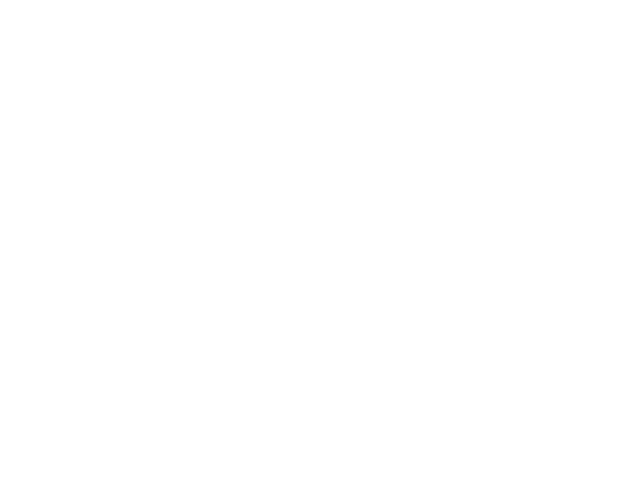

In [6]:
%matplotlib notebook
plot = Plot([Scene([PointsCollection(generate_on_circle())])])
plot.draw()

## dataset 3

<IPython.core.display.Javascript object>


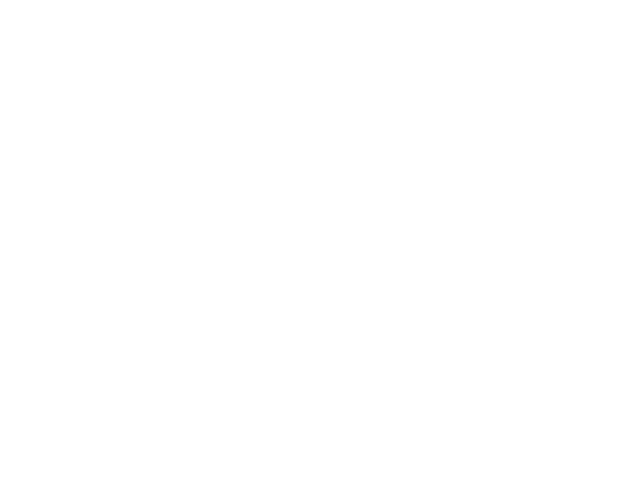

In [7]:
%matplotlib notebook
plot = Plot([Scene([PointsCollection(generate_on_rectangle())])])
plot.draw()

## dataset 4

<IPython.core.display.Javascript object>


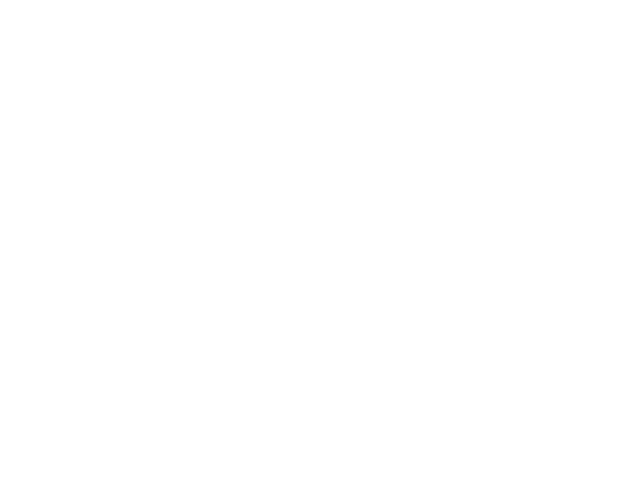

In [8]:
%matplotlib notebook
plot = Plot([Scene([PointsCollection(generate_on_square())])])
plot.draw()

#zad 4

In [9]:
def dot_product(v1, v2):
    return v1[0] * v2[0] + v1[1] * v2[1]

def length(v):
    return np.sqrt(dot_product(v, v))

def get_vector(a, b):
    return b[0] - a[0], b[1] - a[1]

def det_3x3(a, b, c, epsilon=0):
    ca = (c[0] - a[0], c[1] - a[1])
    cb = (c[0] - b[0], c[1] - b[1])
    det = ca[0] * cb[1] - ca[1] * cb[0]
    if det > epsilon:
        return 1
    if det < -epsilon:
        return -1
    else:
        return det

def filter_lowest_y_x(a, b):
    if a[1] < b[1]:
        return a
    if a[1] > b[1]:
        return b
    if a[0] < b[0]:
        return a
    return b

def find_min_angle(a, b, c, epsilon=1e-10):
    det1 = det_3x3(a, b, c, epsilon)
    det2 = det_3x3(a, c, b, epsilon)
    if det1 == det2:
        if length(get_vector(a, b)) > length(get_vector(a, c)):
            return b
        else:
            return c
    if det1 > 0:
        return b
    return c

## Jarvis

In [10]:
%matplotlib notebook

def jarvis(dataset):
    P = functools.reduce(lambda a, b: filter_lowest_y_x(a, b), dataset)
    P0 = P
    stack = [P]
    scenes = [Scene([
        PointsCollection(dataset),
        PointsCollection(stack)
    ])]
    while True:
        P1 = functools.reduce(lambda a, b: find_min_angle(P0, a, b), dataset)
        scenes.append(
            Scene([
                PointsCollection(dataset),
                PointsCollection(stack),
                PointsCollection([P1])
                ])
        )
        P0 = P1
        stack.append(P1)
        if P1 == P:
            break
    
    scenes.append(
        Scene([
            PointsCollection(dataset),
            PointsCollection(stack),
            ])
    )
    return stack, scenes

### dataset 1

execution time: 0.0035088062286376953


<IPython.core.display.Javascript object>


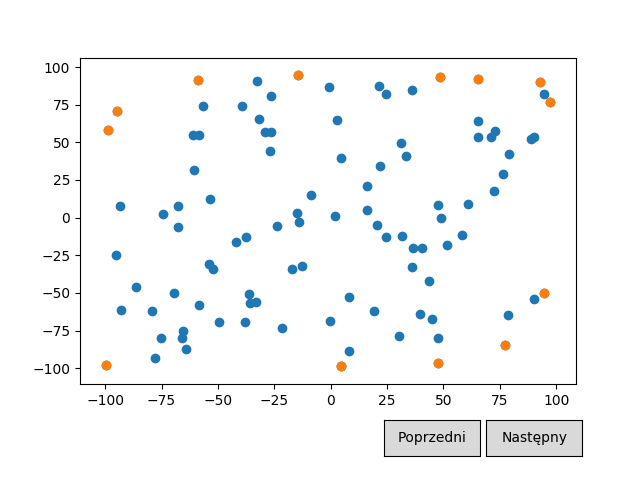

In [21]:
start = time.time()
scenes = jarvis(generate_random())[1]
end = time.time()
print('execution time: ' + str((end-start)))
plot = Plot(scenes)
plot.draw()

### dataset 2

execution time: 0.04227471351623535


<IPython.core.display.Javascript object>


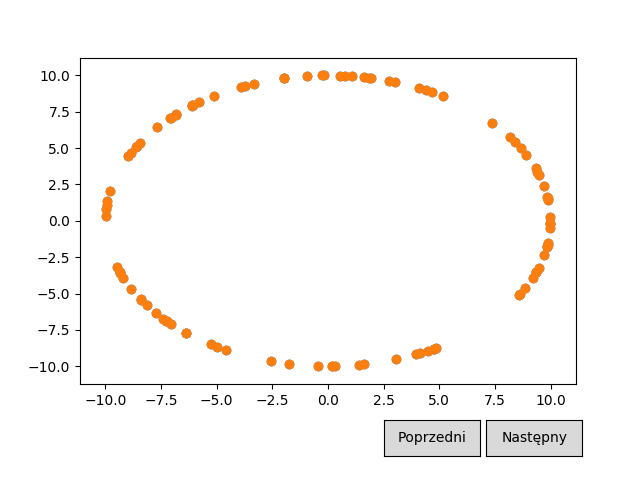

In [22]:
start = time.time()
scenes = jarvis(generate_on_circle())[1]
end = time.time()
print('execution time: ' + str((end-start)))
plot = Plot(scenes)
plot.draw()

### dataset 3

execution time: 0.002721071243286133


<IPython.core.display.Javascript object>


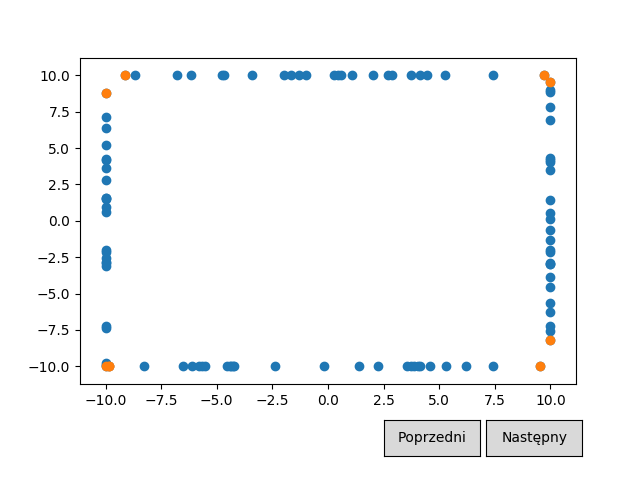

In [23]:
start = time.time()
scenes = jarvis(generate_on_rectangle())[1]
end = time.time()
print('execution time: ' + str((end-start)))
plot = Plot(scenes)
plot.draw()

### dataset 4

execution time: 0.0024509429931640625


<IPython.core.display.Javascript object>


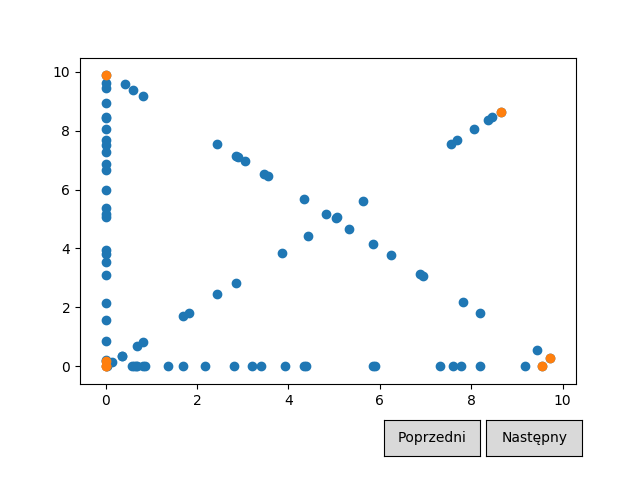

In [24]:
start = time.time()
scenes = jarvis(generate_on_square())[1]
end = time.time()
print('execution time: ' + str((end-start)))
plot = Plot(scenes)
plot.draw()

## Graham

In [15]:
def angle_comparator(a, b, c, epsilon=1e-10):
    if a == b:
        return -1
    if a == c:
        return 1
    det1 = det_3x3(a, b, c, epsilon)
    det2 = det_3x3(a, c, b, epsilon)
    if det1 == det2:
        if length(get_vector(a, b)) > length(get_vector(a, c)):
            return -1
        else:
            return 1
    if det1 > 0:
        return -1
    return 1


def graham(dataset):
    P = functools.reduce(lambda a, b: filter_lowest_y_x(a, b), dataset)
    temp = sorted(dataset, key=functools.cmp_to_key(lambda a, b: angle_comparator(P, a, b)))
    dataset_distinct = [temp[0], temp[1]]
    for i in range(2, len(temp)):
        det1 = det_3x3(P, temp[i-1], temp[i], 1e-10)
        det2 = det_3x3(P, temp[i], temp[i-1], 1e-10)
        if det1!=det2:
            dataset_distinct.append(temp[i])

    scenes = [Scene([
        PointsCollection(dataset),
        PointsCollection([P])
    ])]

    stack = []
    stack.append(dataset_distinct[0])
    stack.append(dataset_distinct[1])
    stack.append(dataset_distinct[2])
    i = 3
    t = 2
    while i < len(dataset_distinct):
        scenes.append(Scene([
            PointsCollection(dataset),
            PointsCollection(stack),
            PointsCollection([stack[t - 1], stack[t], dataset_distinct[i]], color='red', marker='*')
            ]))
        if det_3x3(stack[t - 1], stack[t], dataset_distinct[i], 1e-10) > 0:
            stack.append(dataset_distinct[i])
            t += 1
            i += 1
        else:
            stack.pop()
            t -= 1
    scenes.append(Scene([
        PointsCollection(dataset),
        PointsCollection(stack)
        ]))

    return stack, scenes

### dataset 1

execution time: 0.07332324981689453


<IPython.core.display.Javascript object>


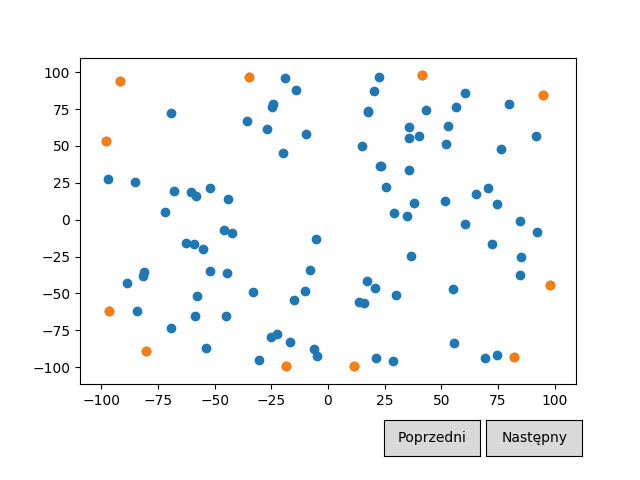

In [20]:
start = time.time()
scenes = graham(generate_random())[1]
end = time.time()
print('execution time: ' + str((end-start)))
plot = Plot(scenes)
plot.draw()

### dataset 2

execution time: 0.012849807739257812


<IPython.core.display.Javascript object>


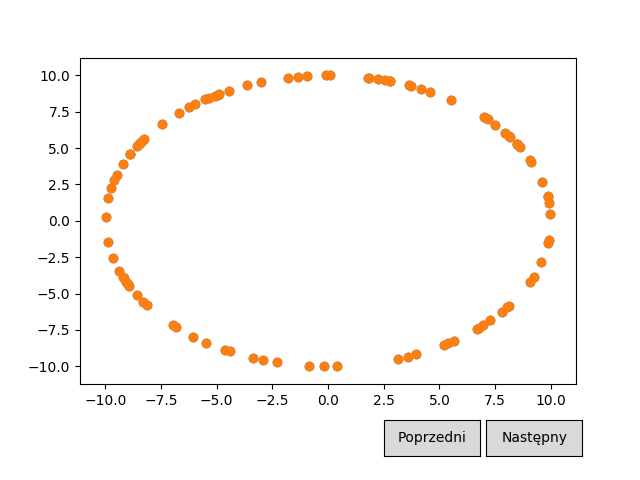

In [25]:
start = time.time()
scenes = graham(generate_on_circle())[1]
end = time.time()
print('execution time: ' + str((end-start)))
plot = Plot(scenes)
plot.draw()

### dataset 3

execution time: 0.013767004013061523


<IPython.core.display.Javascript object>


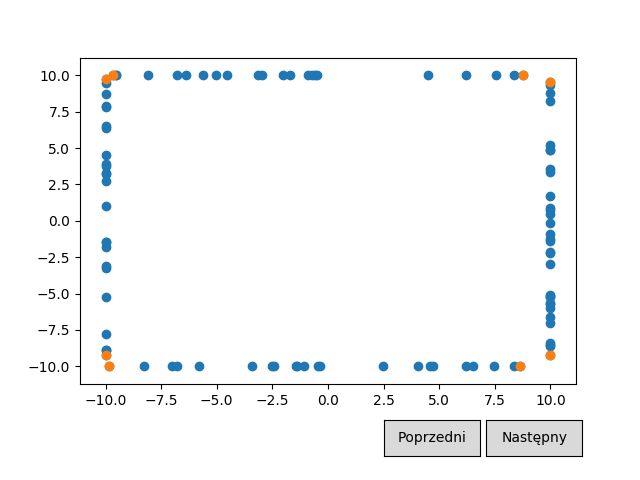

In [26]:
start = time.time()
scenes = graham(generate_on_rectangle())[1]
end = time.time()
print('execution time: ' + str((end-start)))
plot = Plot(scenes)
plot.draw()

### dataset 4

execution time: 0.00922703742980957


<IPython.core.display.Javascript object>


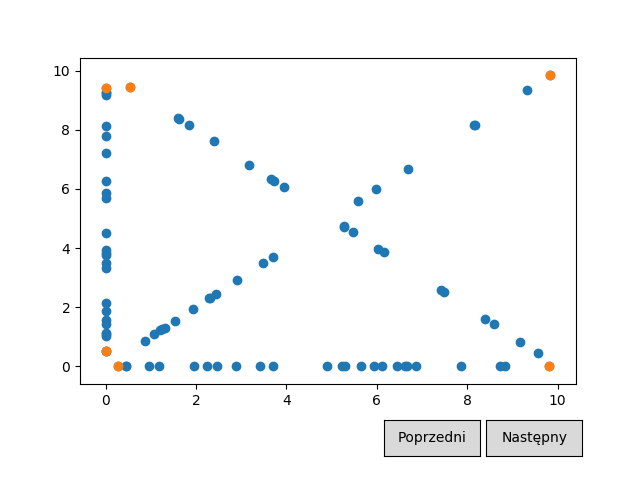

In [27]:
start = time.time()
scenes = graham(generate_on_square())[1]
end = time.time()
print('execution time: ' + str((end-start)))
plot = Plot(scenes)
plot.draw()